# EDA

In [2]:
import pandas as pd
from pathlib import Path

# Ignnore warning
import warnings
warnings.simplefilter(action='ignore')

In [3]:
csv = Path('../Datasets/raw_data/mental-health-statistics-by-state-[updated-may-2023].csv')
cases_df = pd.read_csv(csv)

In [4]:
cases_df.describe()

,RatesOfMentalIllness,adultsWithAnxietyOrDepresion,adultsWithSevereMentalIllness,overallMentalHealthStandingYouthAdults
count,50.000000,50.000000,50.000000,50.00000
mean,21.924600,31.434000,5.190000,25.50000
std,2.621866,3.399076,0.543702,14.57738
min,17.490000,23.900000,4.100000,1.00000
25%,20.512500,30.125000,4.900000,13.25000
50%,21.500000,32.050000,5.300000,25.50000
75%,23.580000,33.100000,5.575000,37.75000
max,29.680000,39.200000,6.300000,50.00000


In [5]:
cases_df['state'].nunique()

50

In [6]:
print(f"{cases_df['RatesOfMentalIllness'].describe()}")

count    50.000000
mean     21.924600
std       2.621866
min      17.490000
25%      20.512500
50%      21.500000
75%      23.580000
max      29.680000
Name: RatesOfMentalIllness, dtype: float64


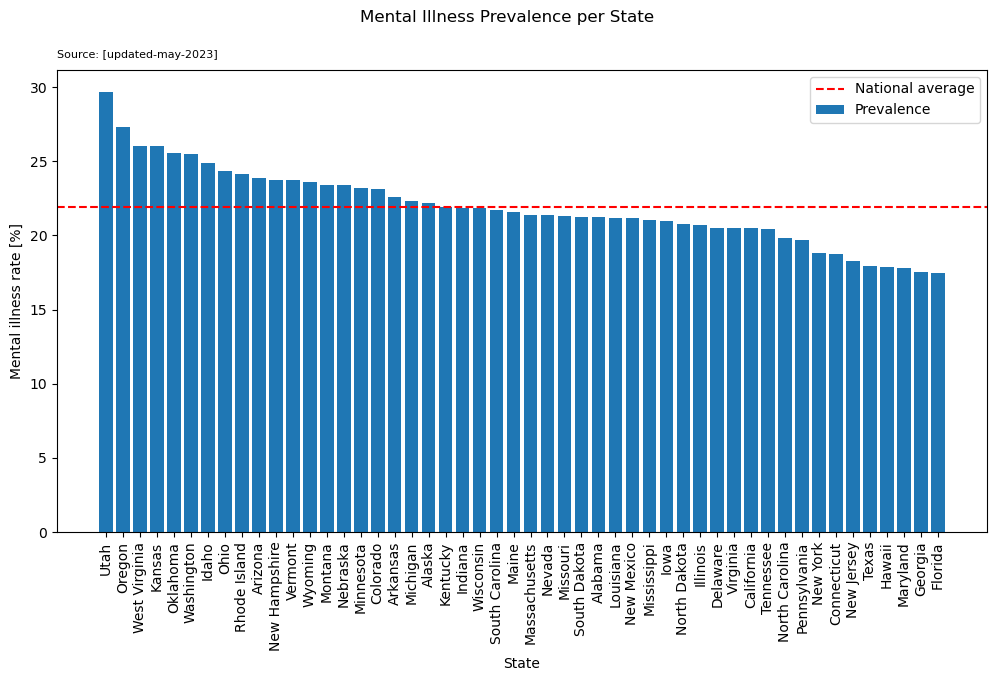

In [7]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(cases_df['state'], cases_df['RatesOfMentalIllness'], label='Prevalence')
ax.axhline(cases_df['RatesOfMentalIllness'].mean(), ls='--', c='r', label='National average')

ax.set_xticklabels(cases_df['state'], rotation=90)
ax.set_xlabel('State')

ax.set_ylabel('Mental illness rate [%]')

fig.suptitle('Mental Illness Prevalence per State')
fig.text(x=0.125, y=0.9, s='Source: [updated-may-2023]', fontsize=8)

ax.legend()

plt.show()

## EDA: Shooters

In [8]:
csv = Path('../Datasets/clean_data/clean_shooters.csv')

In [9]:
features = [
    'Age',
    'Gender',
    'Race',
    'Immigrant',
    'Education',
    'Relationship Status',
    'Employment Status',
    'Employment Type',
    'Military Service',
    'Highest Level of Justice System Involvement',
    'Parental Divorce / Separation',
    'Childhood SES',
    'Mental Illness',
    'Known Family Mental Health History',
    'Autism Spectrum',
    'Health Issues'
]

shooters_df = shooters_df = pd.read_csv(csv)[features]
shooters_df.head()

,Age,Gender,Race,Immigrant,Education,Relationship Status,Employment Status,Employment Type,Military Service,Highest Level of Justice System Involvement,Parental Divorce / Separation,Childhood SES,Mental Illness,Known Family Mental Health History,Autism Spectrum,Health Issues
0,25,0,0.0,0.0,2.0,2.0,0,-1.0,1,4,0,1.0,1,0,0,1
1,18,0,0.0,0.0,0.0,0.0,0,-1.0,0,0,0,1.0,2,0,0,0
2,39,0,0.0,0.0,2.0,2.0,1,2.0,1,1,0,1.0,4,0,0,0
3,56,0,0.0,0.0,-1.0,0.0,1,0.0,0,0,0,-1.0,0,0,0,0
4,31,0,1.0,0.0,2.0,2.0,0,2.0,1,0,1,1.0,2,0,0,0


In [10]:
shooters_df.corr()

,Age,Gender,Race,Immigrant,Education,Relationship Status,Employment Type,Military Service,Highest Level of Justice System Involvement,Parental Divorce / Separation,Childhood SES,Autism Spectrum,Health Issues
Age,1.000000,-0.029650,0.001992,0.122596,-0.053798,0.442169,0.225369,0.008267,-0.034815,-0.234578,-0.410185,-0.178451,0.076495
Gender,-0.029650,1.000000,0.011531,-0.023745,-0.010047,-0.078006,0.007390,-0.083293,-0.084652,0.015855,0.078213,0.185575,-0.050008
Race,0.001992,0.011531,1.000000,0.553319,-0.033333,0.137615,-0.046454,-0.132935,-0.030614,-0.024376,-0.028098,0.054498,-0.050666
Immigrant,0.122596,-0.023745,0.553319,1.000000,0.011353,0.219430,-0.083636,-0.226611,-0.066034,-0.120046,-0.093977,0.069122,-0.025120
Education,-0.053798,-0.010047,-0.033333,0.011353,1.000000,-0.088368,0.399356,0.099738,-0.092940,0.035440,0.366104,0.166238,0.051693
Relationship Status,0.442169,-0.078006,0.137615,0.219430,-0.088368,1.000000,0.100806,0.012633,-0.041397,-0.109955,-0.251498,-0.175816,0.127108
Employment Type,0.225369,0.007390,-0.046454,-0.083636,0.399356,0.100806,1.000000,0.156233,-0.131471,-0.104805,0.108852,0.033622,0.053837
Military Service,0.008267,-0.083293,-0.132935,-0.226611,0.099738,0.012633,0.156233,1.000000,-0.015862,0.029412,0.047206,0.062907,0.045979
Highest Level of Justice System Involvement,-0.034815,-0.084652,-0.030614,-0.066034,-0.092940,-0.041397,-0.131471,-0.015862,1.000000,0.064179,-0.003053,-0.010789,0.064329
Parental Divorce / Separation,-0.234578,0.015855,-0.024376,-0.120046,0.035440,-0.109955,-0.104805,0.029412,0.064179,1.000000,0.182874,0.115806,0.080057


<Axes: >

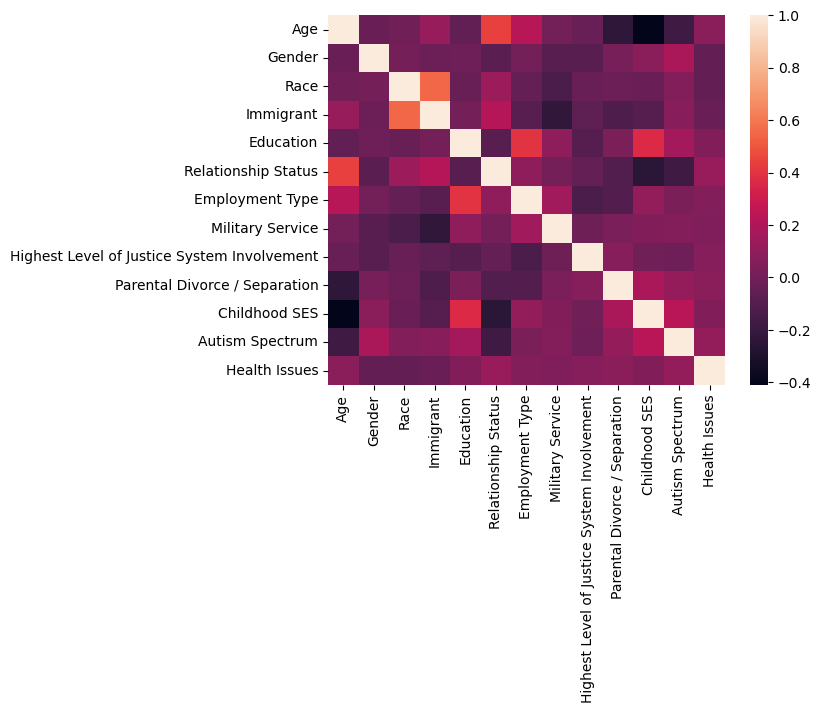

In [11]:
import seaborn as sns 
sns.heatmap(shooters_df.corr())

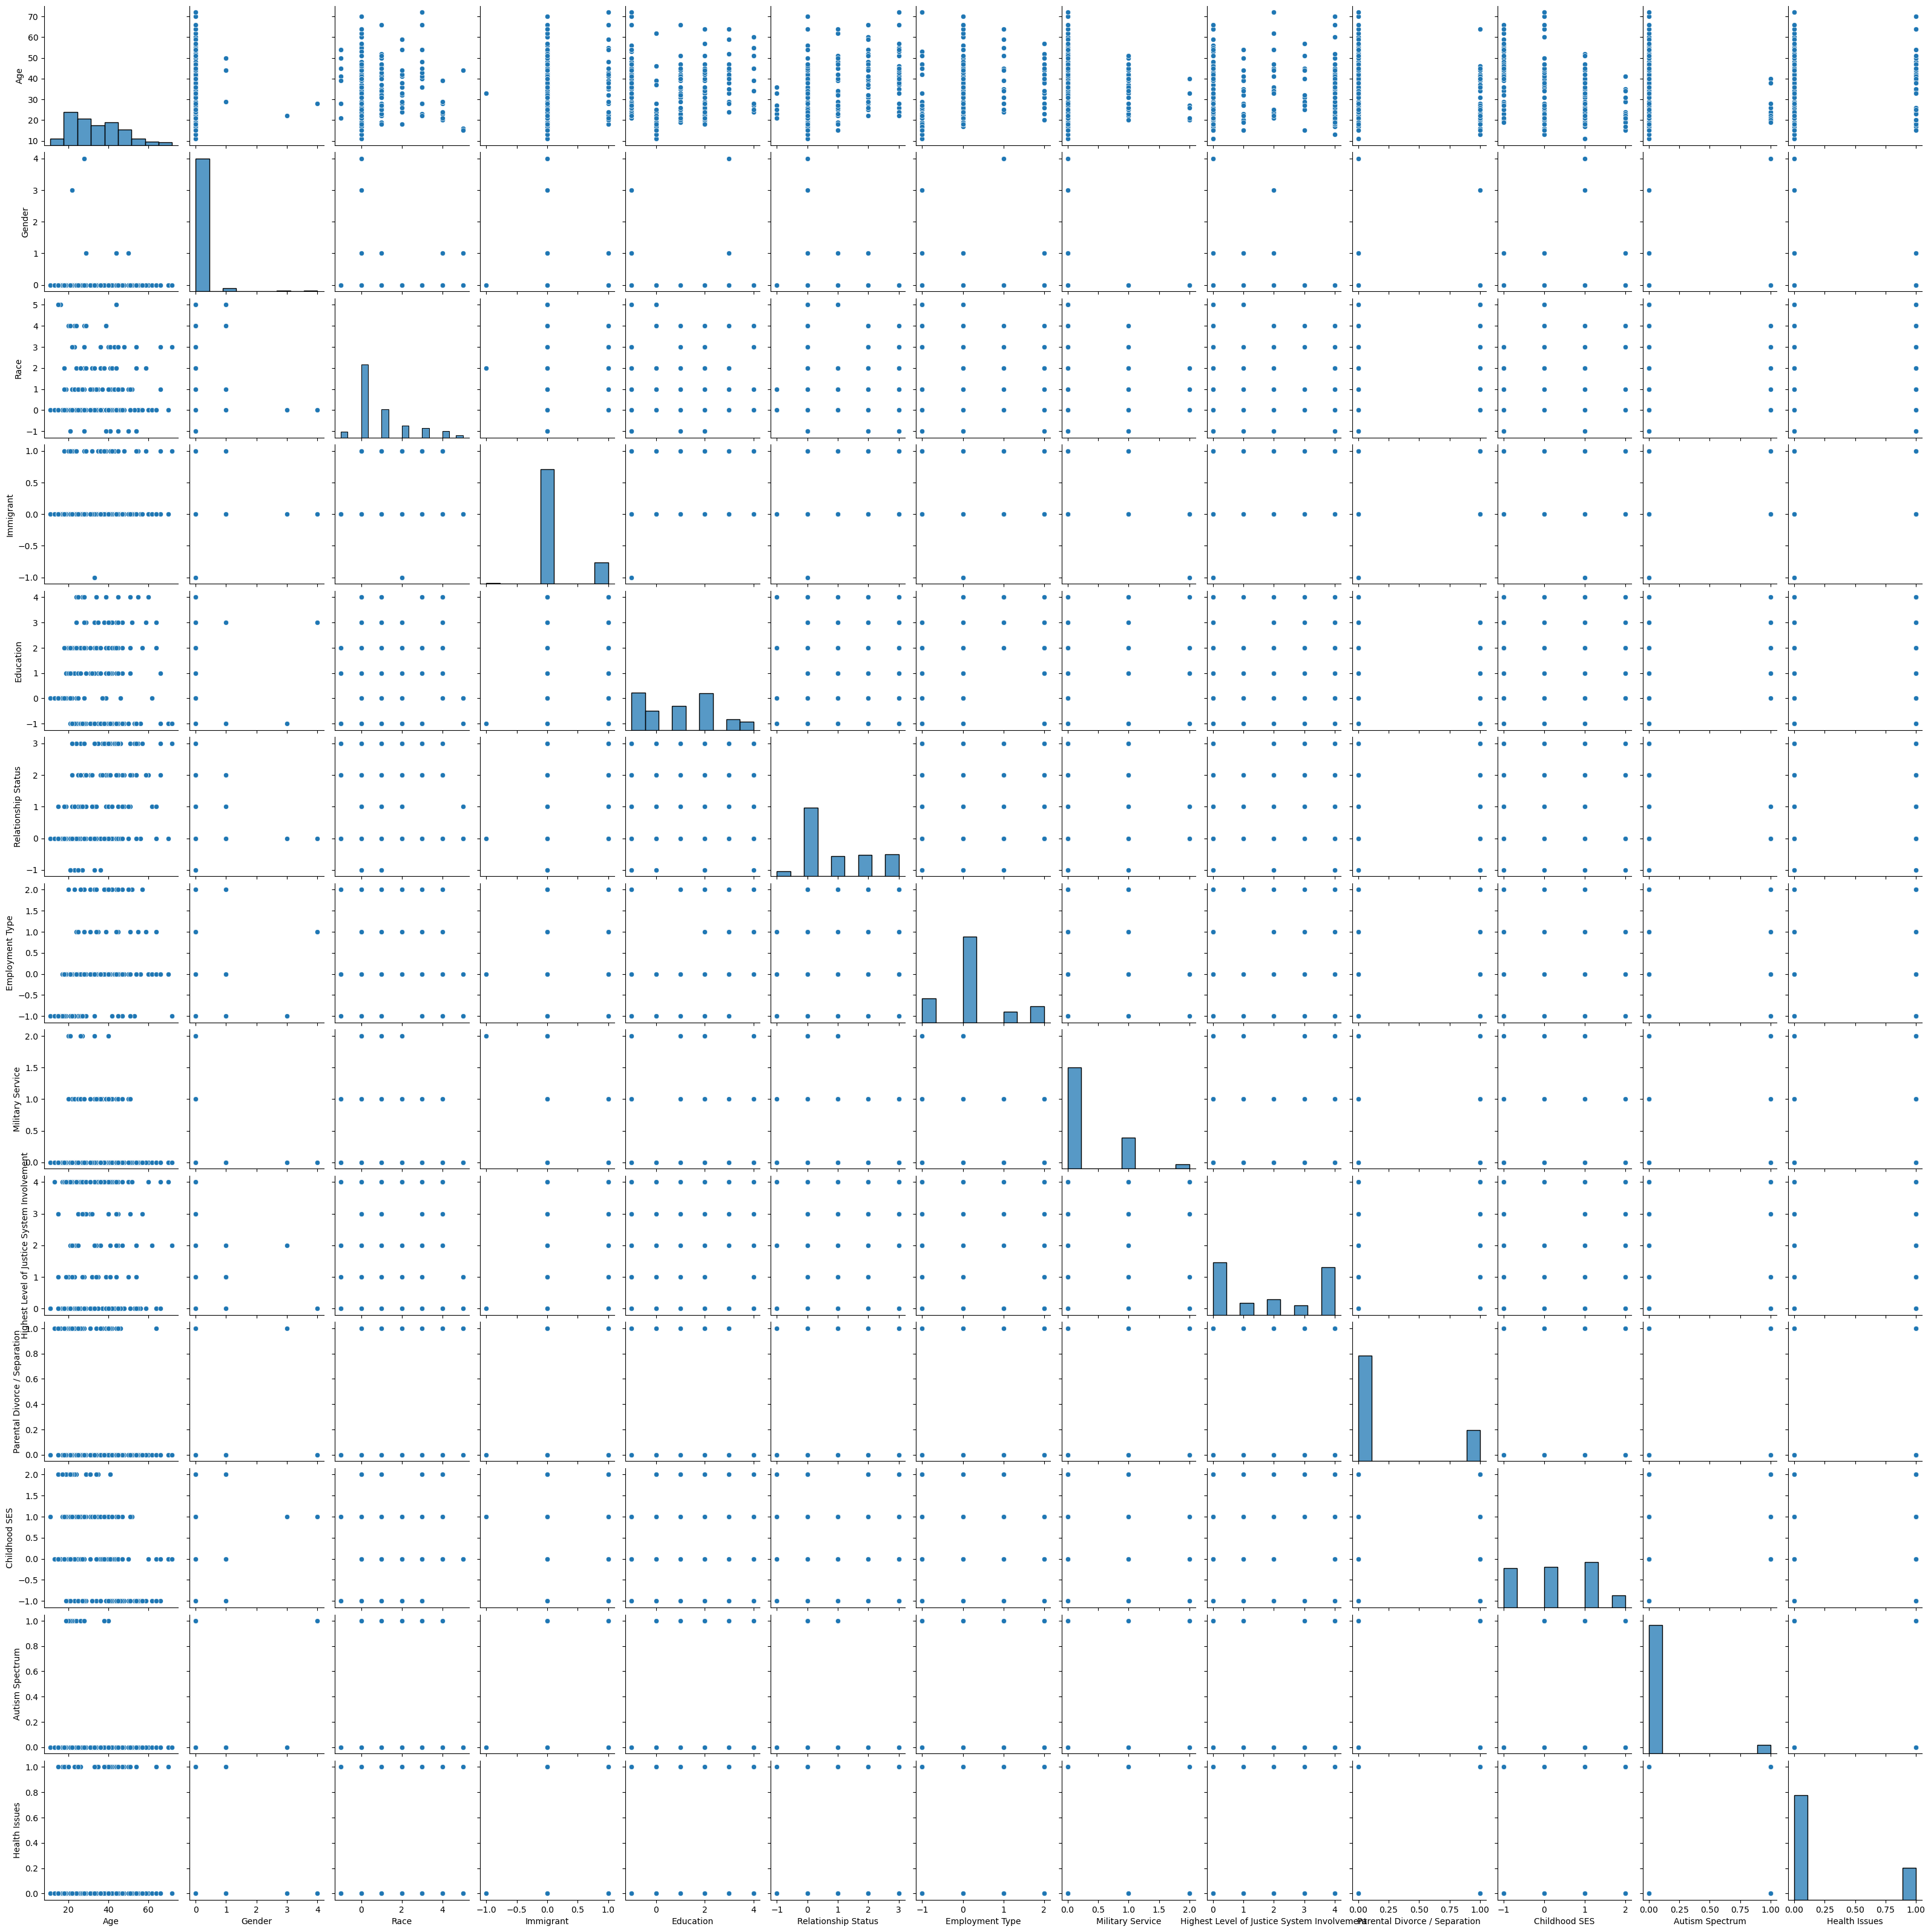

In [12]:
sns.pairplot(shooters_df)

In [13]:
# Count male shooter proportion
shooters_df['Gender'].value_counts()[0]/(187+6)

0.9689119170984456

## Age distribution (general male population)

<Axes: >

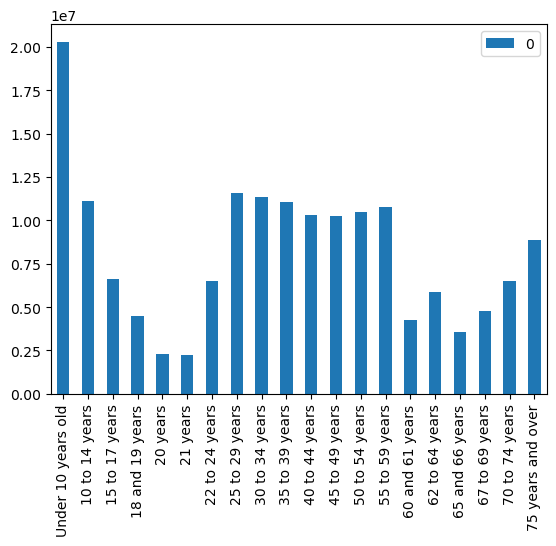

In [14]:
genpop_df = pd.read_csv('../Datasets/clean_data/clean_male_population_age.csv')

# Drop Puerto Rico
genpop_df = genpop_df.loc[genpop_df['state'] != 'PR',:]

# Get country-wide age distribution
age = pd.DataFrame(genpop_df.sum()).T.drop(columns=['state', 'Total Population'])
age.T.plot.bar()

In [15]:
age.columns

Index(['Under 10 years old', '10 to 14 years', '15 to 17 years',
       '18 and 19 years', '20 years', '21 years', '22 to 24 years',
       '25 to 29 years', '30 to 34 years', '35 to 39 years', '40 to 44 years',
       '45 to 49 years', '50 to 54 years', '55 to 59 years', '60 and 61 years',
       '62 to 64 years', '65 and 66 years', '67 to 69 years', '70 to 74 years',
       '75 years and over'],
      dtype='object')

In [16]:
# Group ages in equal buckets of 10 years
decades = pd.DataFrame({
    '<10': age['Under 10 years old'],
    '10-19': age['10 to 14 years'] + age['15 to 17 years'] + age['18 and 19 years'],
    '20-29': age['20 years'] + age['21 years'] + age['22 to 24 years'] + age['25 to 29 years'],
    '30-39': age['30 to 34 years'] + age['35 to 39 years'],
    '40-49': age['40 to 44 years'] + age['45 to 49 years'],
    '50-59': age['50 to 54 years'] + age['55 to 59 years'],
    '60-69': age['60 and 61 years'] + age['62 to 64 years'] + age['65 and 66 years'] + age['67 to 69 years'],
    '>70': age['70 to 74 years'] + age['75 years and over']
}).T.reset_index()

In [17]:
decades['index'].values

array(['<10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '>70'],
      dtype=object)

In [25]:
shooter_age = pd.DataFrame(shooters_df['Age'])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
group_names = decades['index'].values

shooter_age['Bracket'] = pd.cut(shooters_df["Age"], bins, labels=group_names, include_lowest=True)
shooter_age = pd.DataFrame(shooter_age['Bracket'].value_counts())
shooter_age = shooter_age.T[decades['index'].values].T
shooter_age

,Bracket
<10,0
10-19,26
20-29,62
30-39,44
40-49,40
50-59,14
60-69,6
>70,1


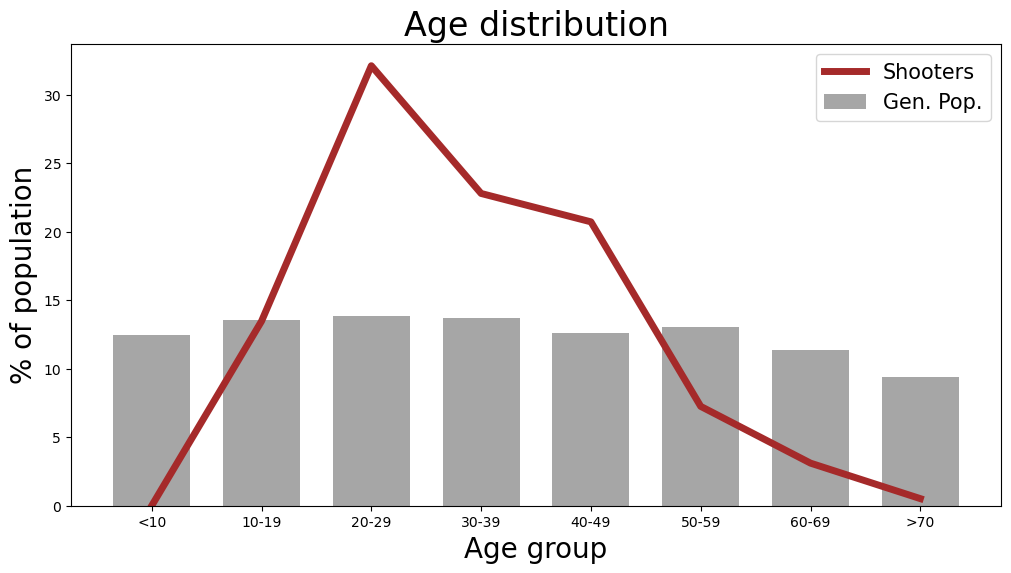

In [26]:
# Create figure
fig, ax = plt.subplots(figsize=(12,6))

# Add genpop and shooters age distribution
ax.bar(decades['index'], 100*decades[0]/decades[0].sum(), label='Gen. Pop.', width=0.7, facecolor='#A6A6A6')
ax.plot(decades['index'], 100*shooter_age['Bracket']/shooter_age['Bracket'].sum(), label='Shooters', c='#A52A2A', linewidth=5)

# Add labels and information
ax.set_title('Age distribution', fontsize=24)
ax.set_xlabel('Age group', fontsize=20)
ax.set_ylabel('% of population', fontsize=20)
ax.legend(fontsize=15)

# Show plot
plt.show()

## Arrest rate

In [20]:
arrests = pd.read_csv('../Datasets/raw_data/FBI_2018_crimeByStates.csv')
100*arrests['Rate'].mean()

2.8922233117647056

## Unemployment

In [21]:
unemployment = pd.read_csv('../Datasets/raw_data/unemployment-rate-by-state-[updated-august-2023].csv')
unemployment['unemploymentRateJuly2022'].mean()

3.288235294117647

## Autism

In [22]:
autism = pd.read_csv('../Datasets/clean_data/clean_autism.csv')
autism['Prevalence'].mean()

2.1876470588235293